In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure


In [18]:
country_co2_raw = pd.read_csv("../data/country/CO2/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3470002.csv", quotechar = '"', skiprows=4)
country_fst_raw = pd.read_csv("../data/country/Forest/API_AG.LND.FRST.ZS_DS2_en_csv_v2_3469441.csv", quotechar = '"', skiprows=4)
country_pop_raw = pd.read_csv("../data/country/Population/API_SP.POP.GROW_DS2_en_csv_v2_3469469.csv", quotechar = '"', skiprows=4)
country_me_raw = pd.read_csv("../data/country/methan/API_EN.ATM.METH.KT.CE_DS2_en_csv_v2_3471999.csv", quotechar = '"', skiprows=4)
country_re_raw = pd.read_csv("../data/country/RE/API_EG.FEC.RNEW.ZS_DS2_en_csv_v2_3471475.csv", quotechar = '"', skiprows=4)



country_co2_raw = country_co2_raw.rename(columns={"Country Name": "Country"})
country_fst_raw = country_fst_raw.rename(columns={"Country Name": "Country"})
country_pop_raw = country_pop_raw.rename(columns={"Country Name": "Country"})
country_me_raw = country_me_raw.rename(columns={"Country Name": "Country"})
country_re_raw = country_re_raw.rename(columns={"Country Name": "Country"})

country_co2 = country_co2_raw.set_index("Country")
country_fst = country_fst_raw.set_index("Country")
country_pop = country_pop_raw.set_index("Country")
country_me = country_me_raw.set_index("Country")
country_re = country_re_raw.set_index("Country")

country_co2_t = country_co2.drop(['Indicator Code', 'Indicator Name', 'Country Code'], axis=1)
country_fst_t = country_fst.drop(['Indicator Code', 'Indicator Name', 'Country Code'], axis=1)
country_pop_t = country_pop.drop(['Indicator Code', 'Indicator Name', 'Country Code'], axis=1)
country_me_t = country_me.drop(['Indicator Code', 'Indicator Name', 'Country Code'], axis=1)
country_re_t = country_re.drop(['Indicator Code', 'Indicator Name', 'Country Code'], axis=1)

country_co2_t = country_co2_t.T
country_fst_t = country_fst_t.T
country_pop_t = country_pop_t.T
country_me_t = country_me_t.T
country_re_t = country_re_t.T

selected_countries_co2 = country_co2_t[["India", "United States", "Mexico", "Russian Federation", "Vietnam", "Thailand"]].T
selected_countries_forest = country_fst_t[["India", "United States", "Mexico", "Russian Federation", "Vietnam", "Thailand"]].T
selected_countries_pop = country_pop_t[["India", "United States", "Mexico", "Russian Federation", "Vietnam", "Thailand"]].T
selected_countries_me = country_me_t[["India", "United States", "Mexico", "Russian Federation", "Vietnam", "Thailand"]].T
selected_countries_re = country_re_t[["India", "United States", "Mexico", "Russian Federation", "Vietnam", "Thailand"]].T

In [19]:
high_co2 = country_co2_t[["United States", "Mexico", "India"]]
low_co2 = country_co2_t[["Russian Federation", "Vietnam", "Thailand"]]
high_fst = country_fst_t[["United States", "Mexico", "India"]]
low_fst = country_fst_t[["Russian Federation", "Vietnam", "Thailand"]]
high_pop = country_pop_t[["United States", "Mexico", "India"]]
low_pop = country_pop_t[["Russian Federation", "Vietnam", "Thailand"]]
co2 = country_co2_t[["Russian Federation", "Vietnam", "Thailand", "United States", "Mexico", "India"]]
pop = country_pop_t[["Russian Federation", "Vietnam", "Thailand", "United States", "Mexico", "India"]]
forest = country_fst_t[["Russian Federation", "Vietnam", "Thailand", "United States", "Mexico", "India"]]
me = country_me_t[["Russian Federation", "Vietnam", "Thailand", "United States", "Mexico", "India"]]
re = country_re_t[["Russian Federation", "Vietnam", "Thailand", "United States", "Mexico", "India"]]



A - Datatypes/Dataframe-Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            203 non-null    float64
 5   1961            204 non-null    float64
 6   1962            206 non-null    float64
 7   1963            207 non-null    float64
 8   1964            213 non-null    float64
 9   1965            213 non-null    float64
 10  1966            213 non-null    float64
 11  1967            213 non-null    float64
 12  1968            213 non-null    float64
 13  1969            213 non-null    float64
 14  1970            214 non-null    float64
 15  1971            215 non-null    float64
 16  1972            216 non-null    float64
 1

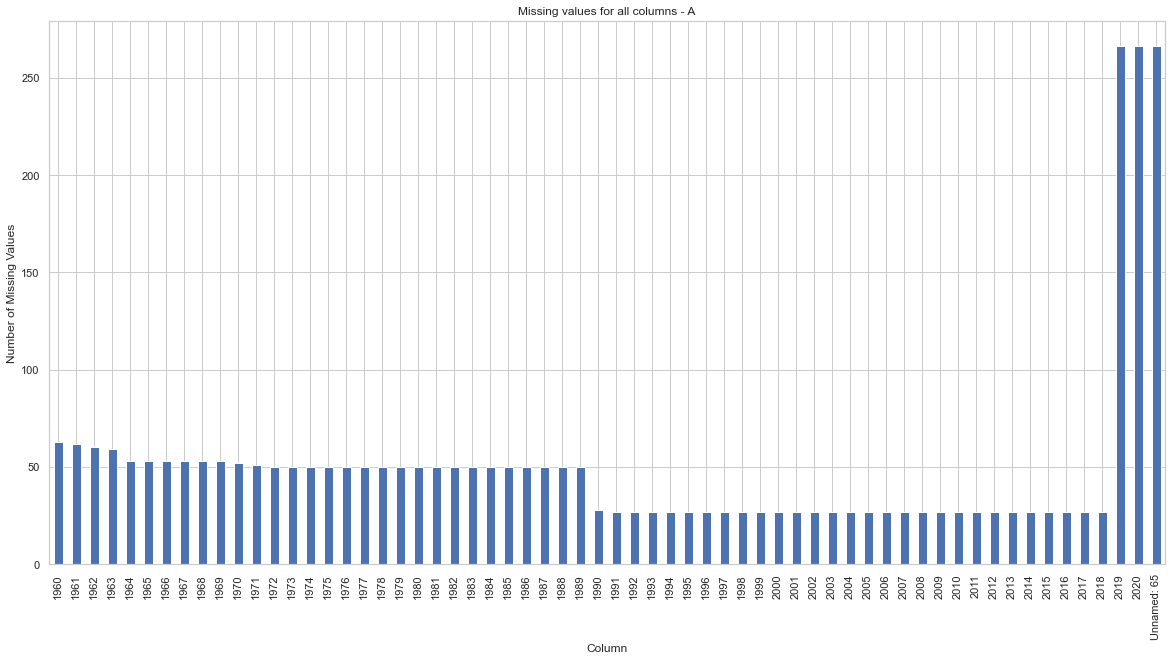



Evaluation of missing values for B:
1960           266
1961           266
1962           266
1963           266
1964           266
              ... 
2017             5
2018             5
2019             9
2020             9
Unnamed: 65    266
Length: 62, dtype: int64


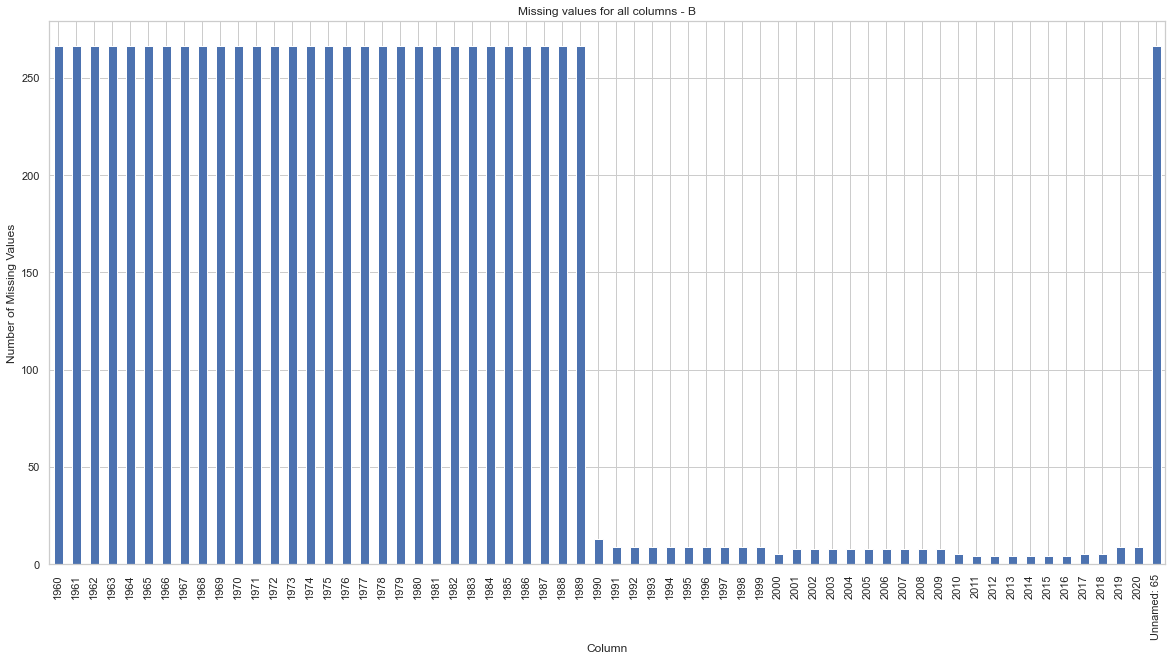



Evaluation of missing values for C:
1960           265
1961             2
1962             2
1963             2
1964             2
              ... 
2017             2
2018             2
2019             2
2020             2
Unnamed: 65    266
Length: 62, dtype: int64


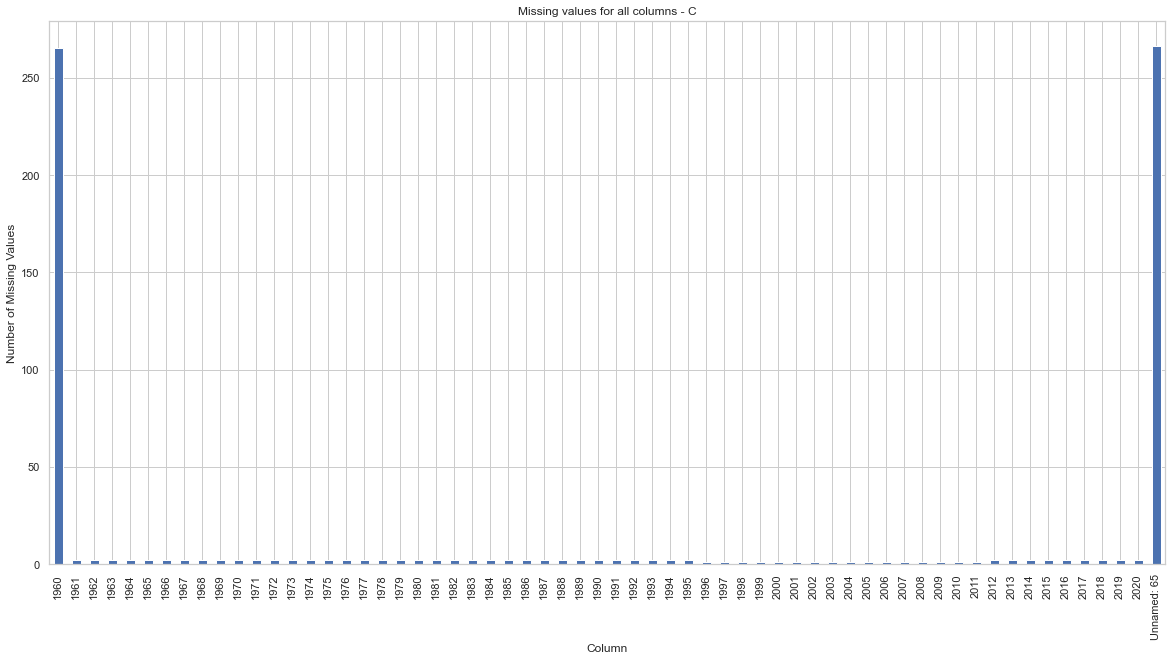



Evaluation of missing values for D:
1960           266
1961           266
1962           266
1963           266
1964           266
              ... 
2017            27
2018            27
2019           266
2020           266
Unnamed: 65    266
Length: 62, dtype: int64


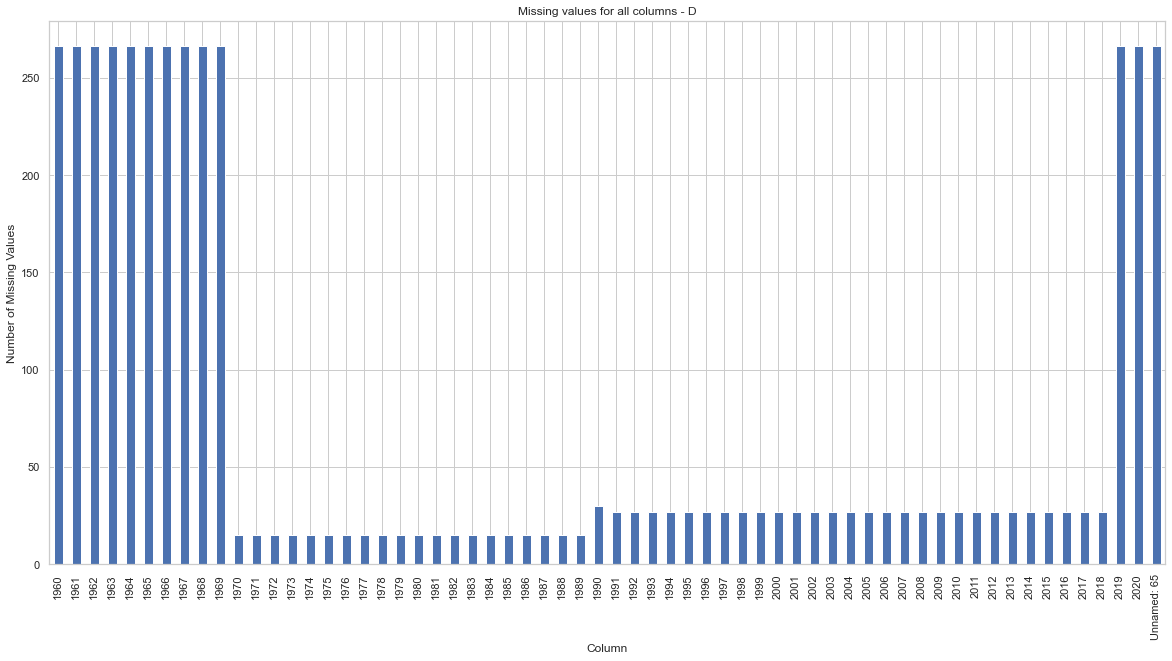



Evaluation of missing values for E:
1960           266
1961           266
1962           266
1963           266
1964           266
              ... 
2017            53
2018            53
2019           266
2020           266
Unnamed: 65    266
Length: 62, dtype: int64


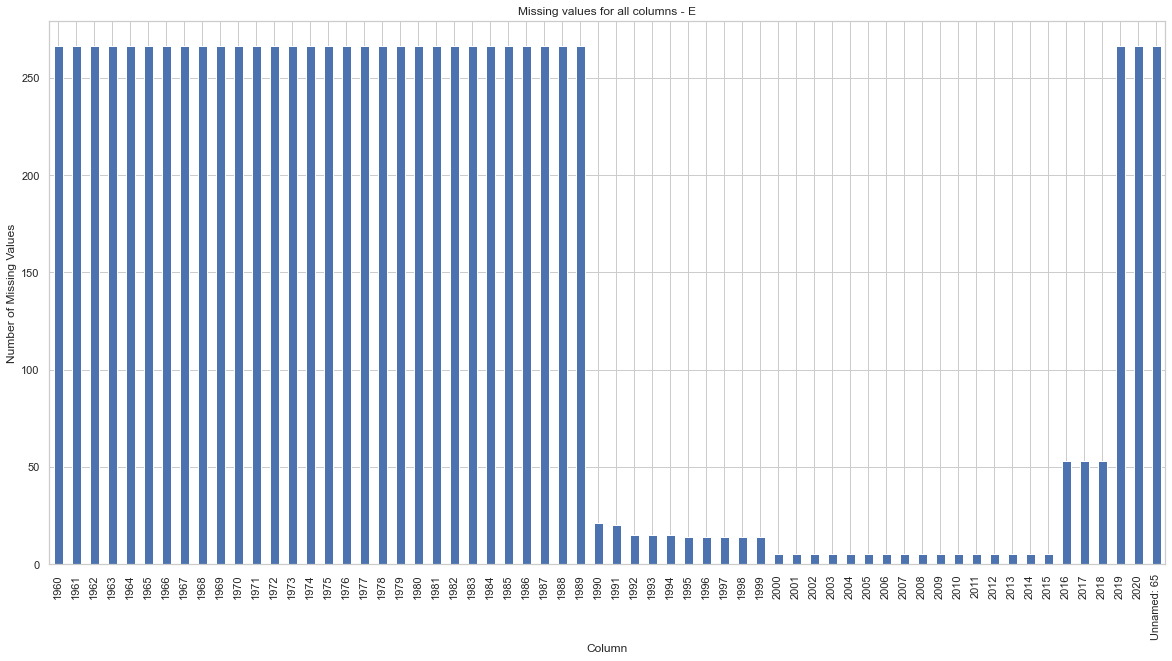

In [20]:
def print_missing_values_summary(df, title):
    print(f"\n\nEvaluation of missing values for {title}:")
    # number of missing values in total
    nr_missing_values = df.isna().sum()
    print(nr_missing_values[nr_missing_values > 0])

    if nr_missing_values[nr_missing_values > 0].size != 0:
        nr_missing_values[nr_missing_values > 0].plot.bar(figsize=(20,10))
        plt.xlabel("Column")
        plt.ylabel("Number of Missing Values")
        plt.title(f"Missing values for all columns - {title}")
        plt.gcf().subplots_adjust
        plt.show()
    else:
        print(f'No missing values for {title}')

print("\nA - Datatypes/Dataframe-Information:")
print(country_co2_raw.info())

print("\nB - Datatypes/Dataframe-Information:")
print(country_fst_raw.info())

print("\nB - Datatypes/Dataframe-Information:")
print(country_pop_raw.info())



print_missing_values_summary(country_co2_raw, "A")
print_missing_values_summary(country_fst_raw, "B")
print_missing_values_summary(country_pop_raw, "C")
print_missing_values_summary(country_me_raw, "D")
print_missing_values_summary(country_re_raw, "E")

Datasets

Co2 :
 "CO2 emissions (kt)","Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring.","Data for up to 1990 are sourced from Carbon Dioxide Information Analysis Center, Environmental Sciences Division, Oak Ridge National Laboratory, Tennessee, United States. Data from 1990 are CAIT data: Climate Watch. 2020. GHG Emissions. Washington, DC: World Resources Institute. Available at: https://www.climatewatchdata.org/ghg-emissions.",

forest:
 "AG.LND.FRST.ZS","Forest area (% of land area)","Forest area is land under natural or planted stands of trees of at least 5 meters in situ, whether productive or not, and excludes tree stands in agricultural production systems (for example, in fruit plantations and agroforestry systems) and trees in urban parks and gardens.","Food and Agriculture Organization, electronic files and web site.",

population:
 "SP.POP.GROW","Population growth (annual %)","Annual population growth rate for year t is the exponential rate of growth of midyear population from year t-1 to t, expressed as a percentage . Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.","Derived from total population. Population source: (1) United Nations Population Division. World Population Prospects: 2019 Revision, (2) Census reports and other statistical publications from national statistical offices, (3) Eurostat: Demographic Statistics, (4) United Nations Statistical Division. Population and Vital Statistics Reprot (various years), (5) U.S. Census Bureau: International Database, and (6) Secretariat of the Pacific Community: Statistics and Demography Programme.",

Methan:
"EN.ATM.METH.KT.CE","Methane emissions (kt of CO2 equivalent)","Methane emissions are those stemming from human activities such as agriculture and from industrial methane production.","Data for up to 1990 are sourced from Carbon Dioxide Information Analysis Center, Environmental Sciences Division, Oak Ridge National Laboratory, Tennessee, United States. Data from 1990 are CAIT data: Climate Watch. 2020. GHG Emissions. Washington, DC: World Resources Institute. Available at: https://www.climatewatchdata.org/ghg-emissions.",

Renewable energy:
"EG.FEC.RNEW.ZS","Renewable energy consumption (% of total final energy consumption)","Renewable energy consumption is the share of renewables energy in total final energy consumption.","World Bank, Sustainable Energy for All (SE4ALL) database from the SE4ALL Global Tracking Framework led jointly by the World Bank, International Energy Agency, and the Energy Sector Management Assistance Program.",


In [21]:
#select_countrye.sort_values(["size"], ascending=False)

In [22]:
def print_piechart_sum(df, title):
    Temp = df.reset_index()
    #adddd = Temp
    varr = Temp.sum(axis = 1)
    Temp["pop_increase"] = varr
    #testtt = df.sum(axis = 1)
    fig1 = px.pie(Temp,
                                    values="pop_increase", 
                                    names='Country',
                                    title=f'{title}')
    fig1.show()

def print_barplot_sum(df, title, ylabel):
    ssc = df[["Russian Federation", "Vietnam", "Thailand", "United States", "Mexico", "India"]].T
    ssy = ssc[["2018"]]
    ssy = ssy.reset_index()
    fig, ax1 = plt.subplots(figsize=(20, 10), dpi=100)
    sns.set_theme(style="whitegrid")
    tr = ssy.melt(id_vars='Country').rename(columns=str.title)
    tr = tr.rename(columns={"Variable": "Years", "Value": f'{ylabel}'})
    sns.barplot(x='Country', y=f'{ylabel}', hue='Years', data=tr, ax=ax1)
    fig.suptitle(f'{title}', fontsize=30)
    sns.despine(fig)

def print_lineplot_sum(df, title, ylabel):
    df.plot(figsize=(20,5))
    plt.xlabel('Years')
    plt.ylabel(f'{ylabel}') 
    plt.title(f'{title}')
    plt.show()


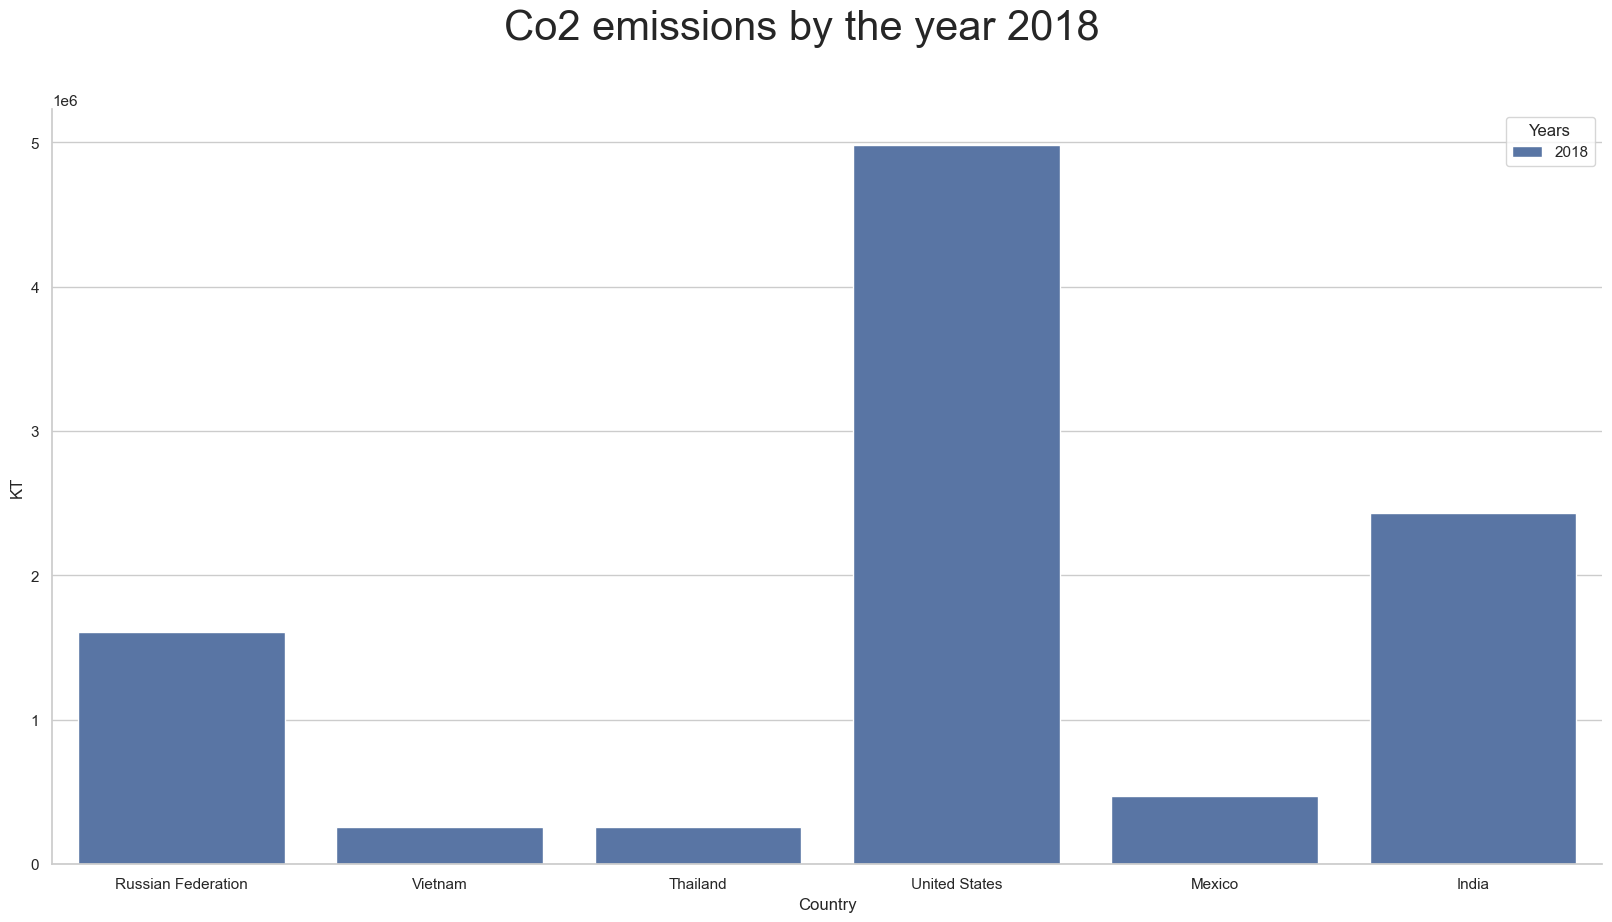

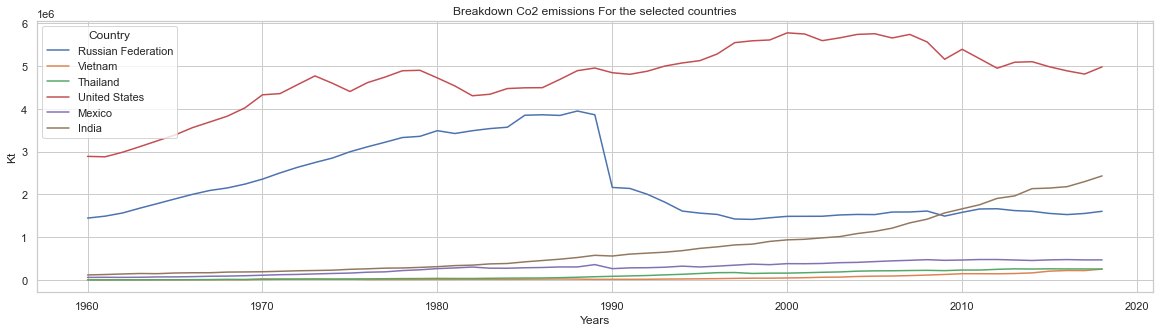

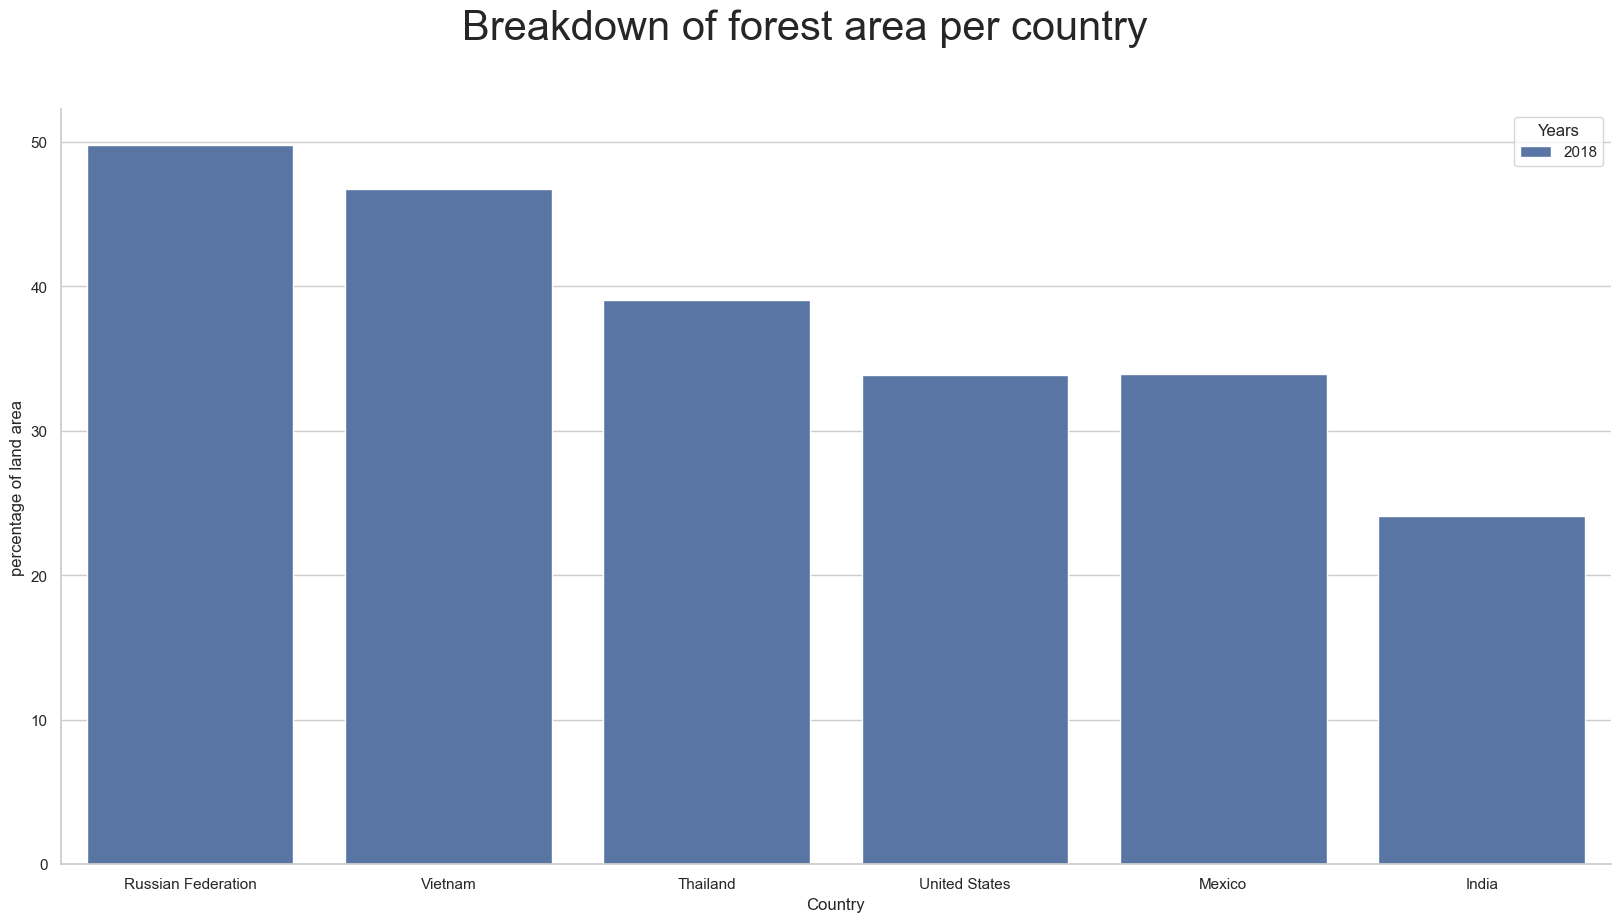

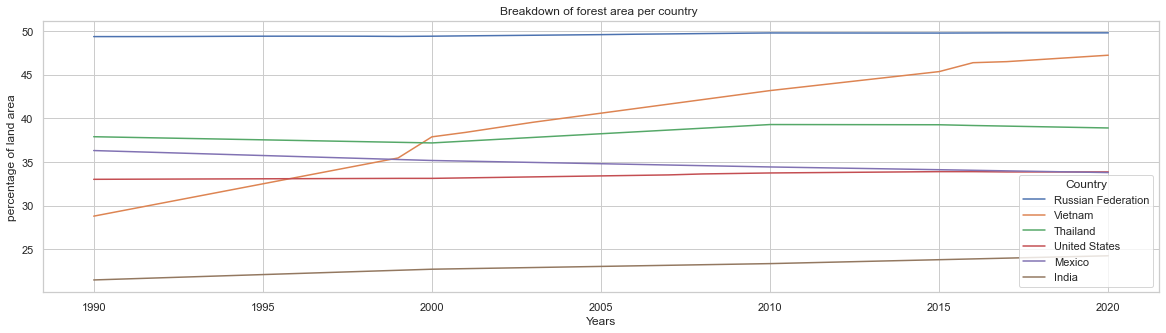

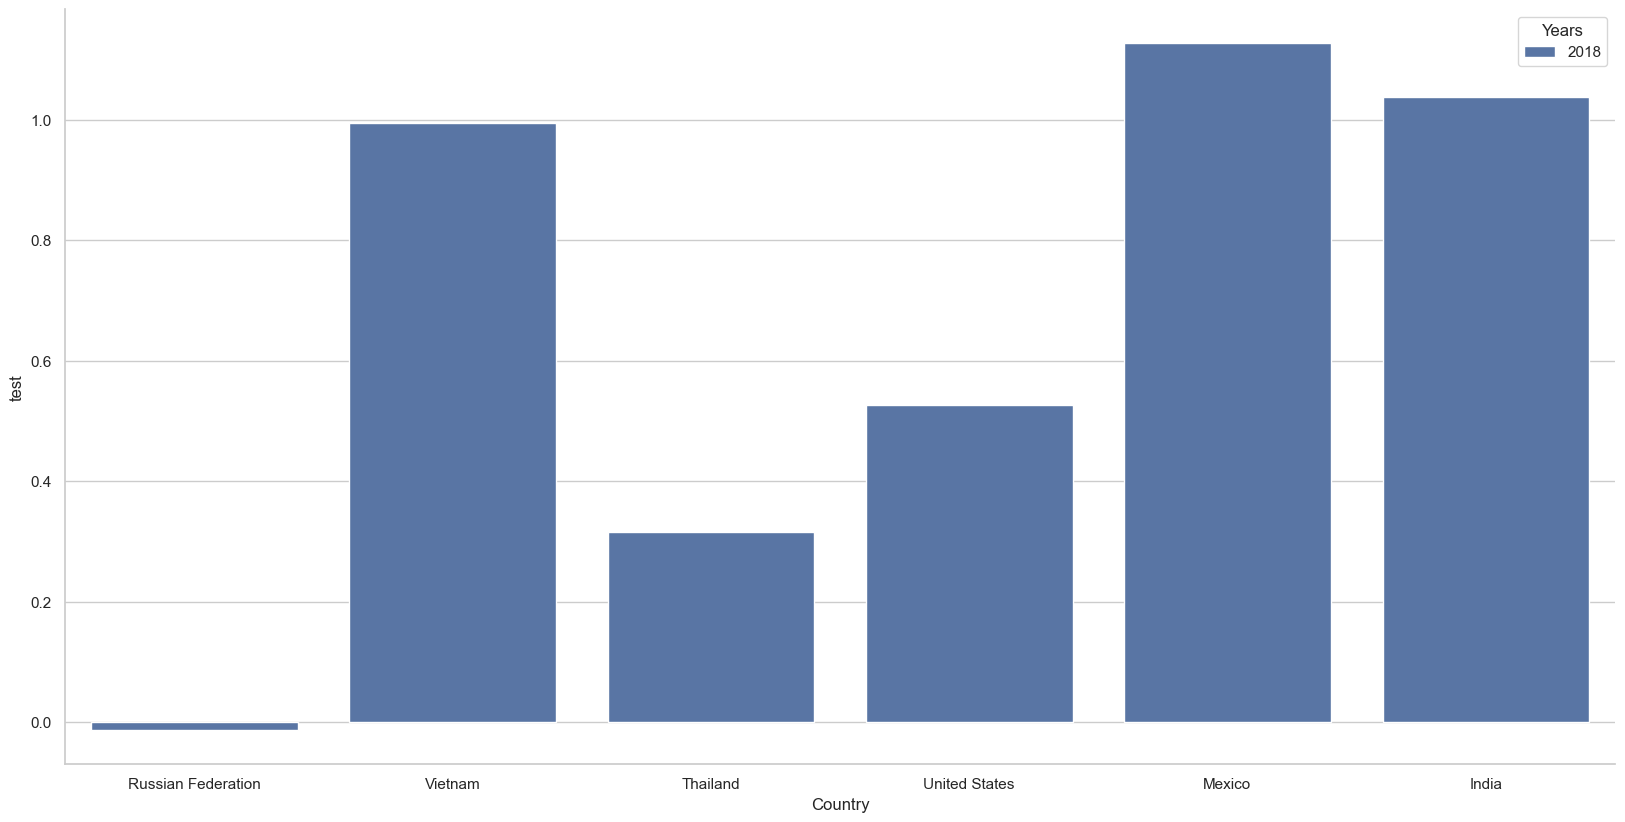

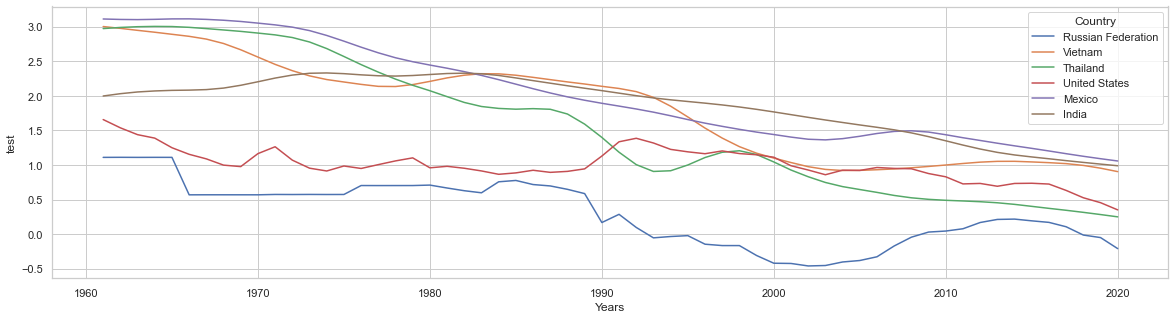

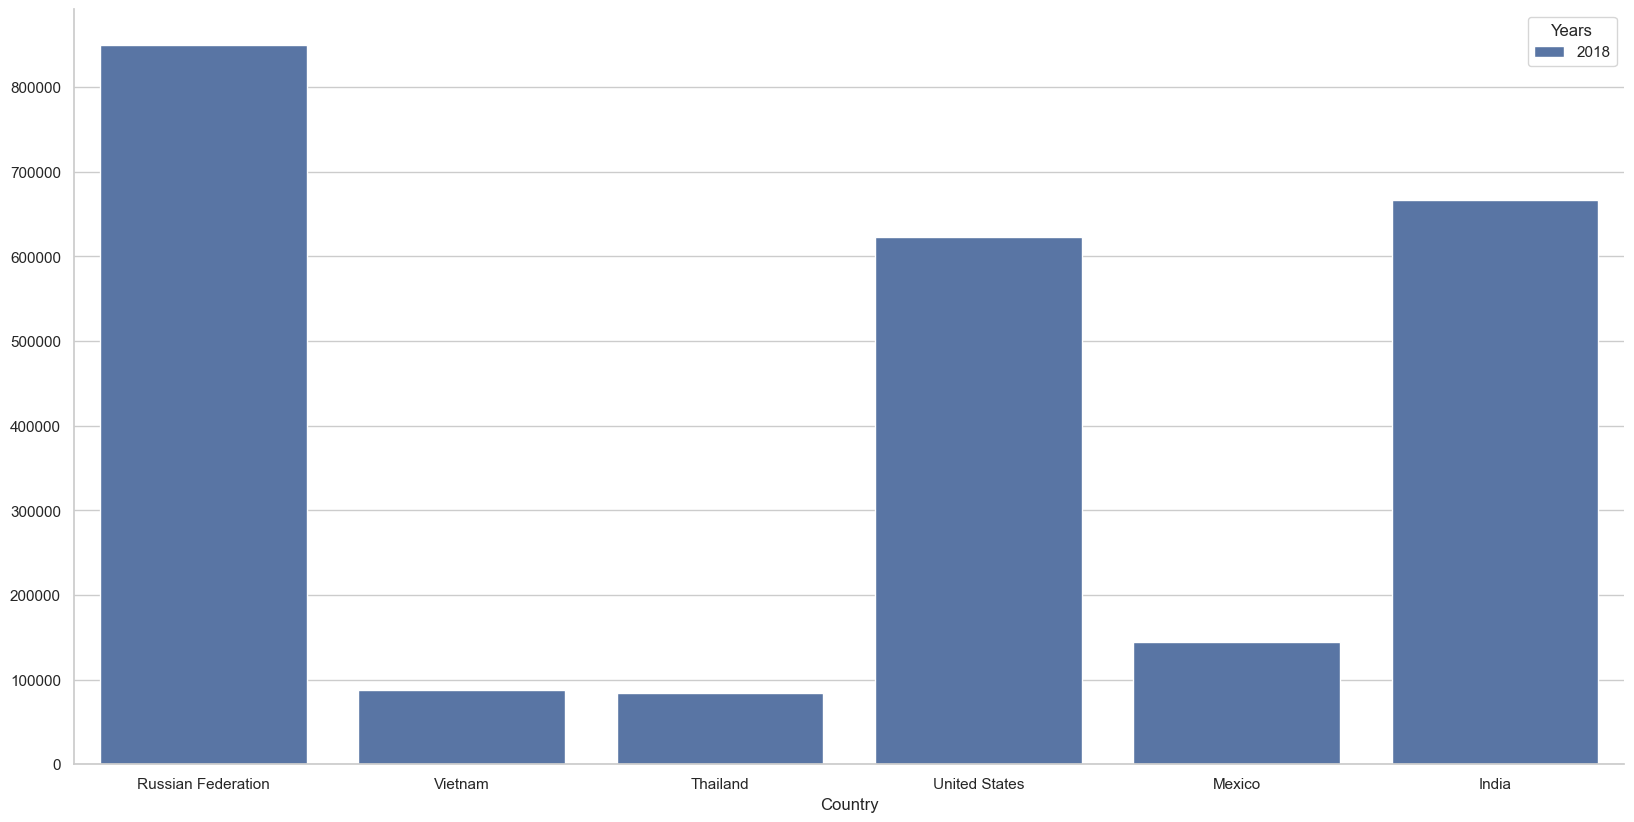

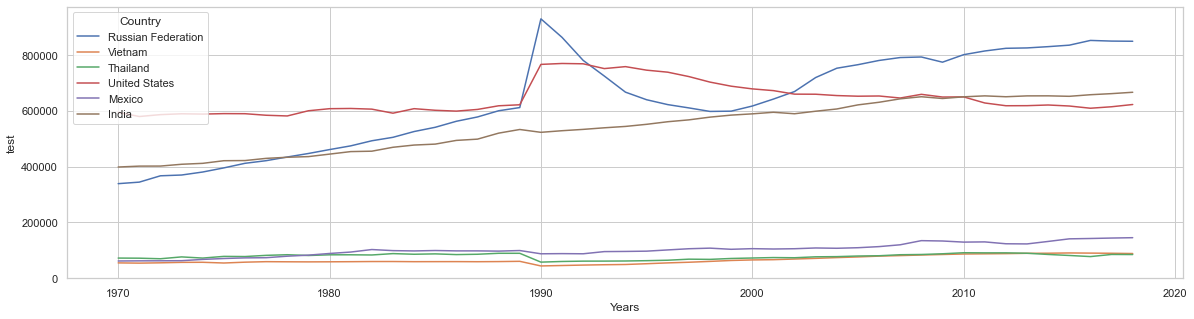

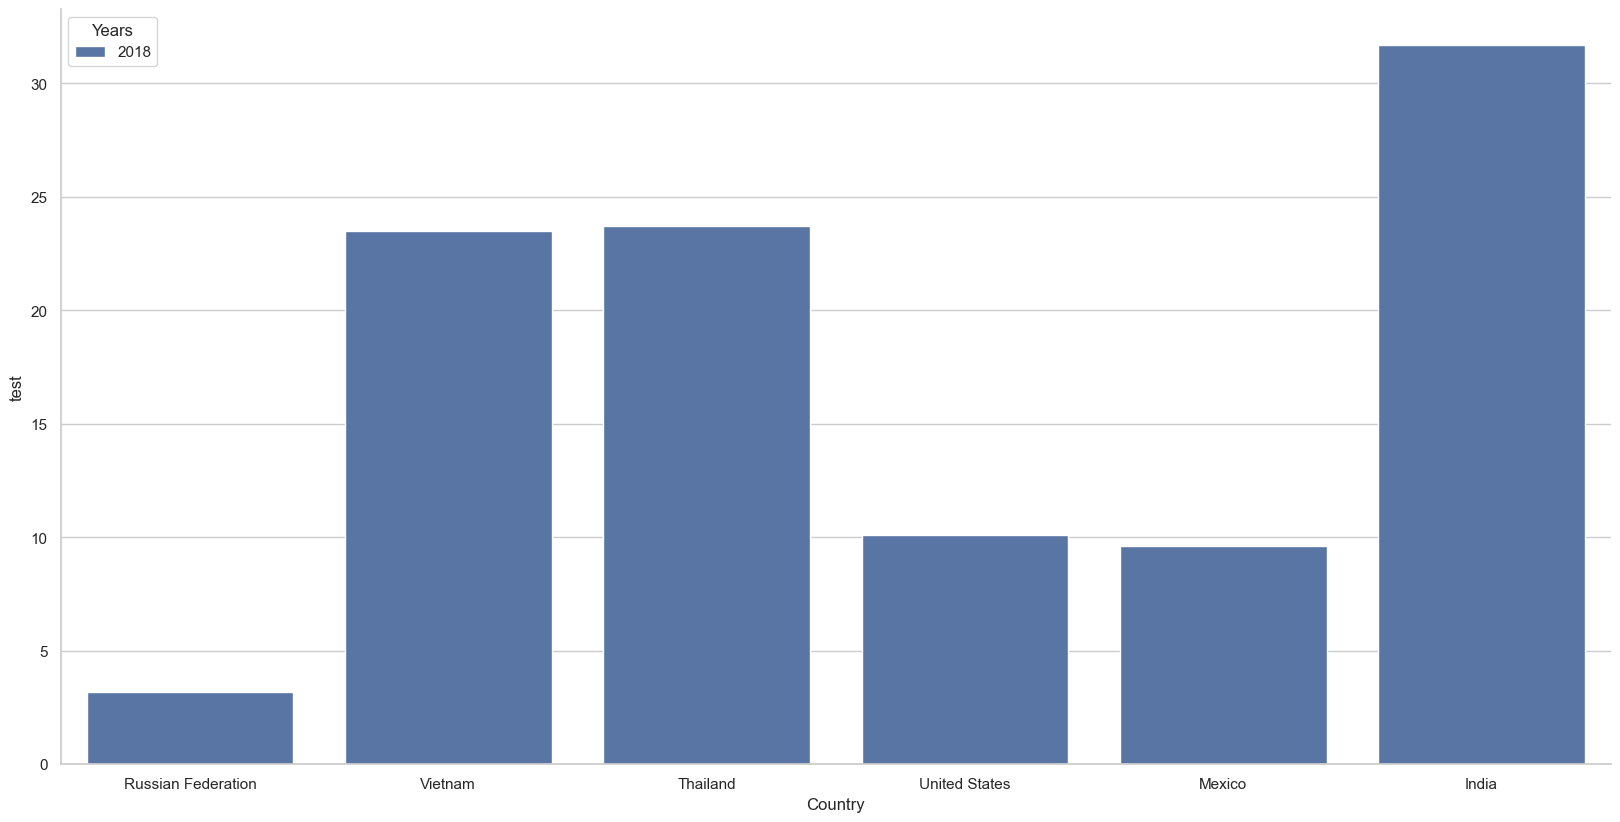

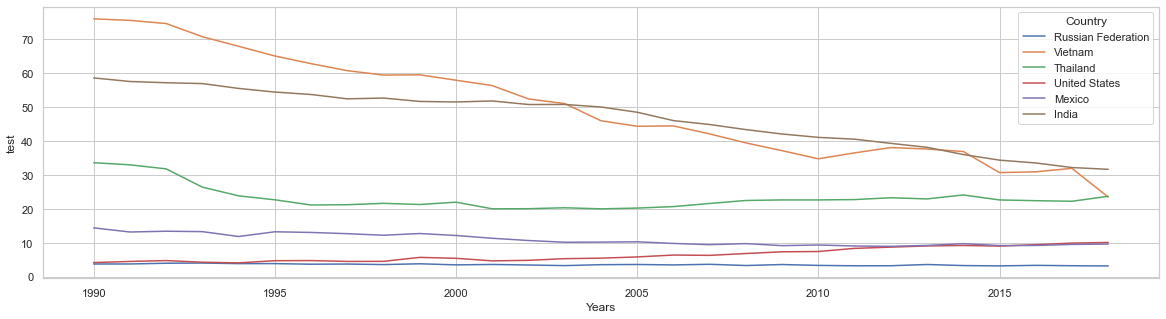

In [23]:
print_barplot_sum(country_co2_t, "Co2 emissions by the year 2018", "KT")
print_lineplot_sum(co2, "Breakdown Co2 emissions For the selected countries", "Kt")
print_piechart_sum(selected_countries_co2, "Total Co2 emmision Since 1962")

print_barplot_sum(country_fst_t, "Breakdown of forest area per country ", "percentage of land area")
print_lineplot_sum(forest, "Breakdown of forest area per country ", "percentage of land area")
print_piechart_sum(selected_countries_forest, "forest area per country  Since 1962")

print_barplot_sum(country_pop_t, "", "test")
print_lineplot_sum(pop, "", "test")
print_piechart_sum(selected_countries_pop, "")

print_barplot_sum(country_me_t, "","")
print_lineplot_sum(me, "", "test")
print_piechart_sum(selected_countries_me, "")

print_barplot_sum(country_re_t, "", "test")
print_lineplot_sum(re, "", "test")
print_piechart_sum(selected_countries_re, "")